<a href="https://colab.research.google.com/github/sal81/Time-Series-Prediction/blob/master/AutoArima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import pandas as pd
import os
from datetime import datetime

defining the size of figure and turning off grids

In [32]:
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

NY enegy consumption dataset scraped by Srivatsan Srinivasan of YT channel AI Engineering. Link to Git repo: https://github.com/srivatsan88. 

In [33]:
df= pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv')

Printing the first few set of data for better understanding of table structure

In [34]:
df.head(5)

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [159]:
df.tail(5)

,timeStamp,demand,precip,temp
49200,2017-08-12 02:00:00,5534.683,0.0000,70.84
49201,2017-08-12 03:00:00,5534.683,0.0000,70.57
49202,2017-08-12 04:00:00,5534.683,0.0000,69.89
49203,2017-08-12 05:00:00,5534.683,0.0000,68.59
49204,2017-08-12 06:00:00,5534.683,0.0031,67.33


Convert the timeStamp column to datetime format

In [35]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [36]:
df.head(5)

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


Plotly express trend graph for better visualisation

In [37]:
fig = px.line(df, x= 'timeStamp', y= 'demand', title = "NY Energy Consumption trends")
fig.update_xaxes(rangeslider_visible = True)
fig.show()

Set timeStamp as index

In [38]:
ny_df = df.set_index('timeStamp')

In [39]:
ny_df.head(5)

,demand,precip,temp
timeStamp,,,
2012-01-01 00:00:00,4937.5,0.0,46.13
2012-01-01 01:00:00,4752.1,0.0,45.89
2012-01-01 02:00:00,4542.6,0.0,45.04
2012-01-01 03:00:00,4357.7,0.0,45.03
2012-01-01 04:00:00,4275.5,0.0,42.61


Plot all values against timeStamp on X axis

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f21ccd5e5c0>,
      dtype=object)

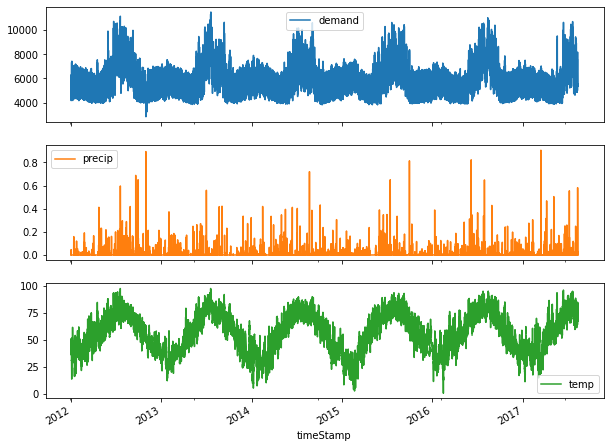

In [40]:
ny_df.plot(subplots='True')

Find if values are missing

In [41]:
print('Rows : ', df.shape[0])
print('Columns : ', df.shape[1])
print('Features : ', df.columns.tolist())
print('Missing values :\n', df.isnull().any())
print('Unique Values :\n', df.nunique())

Rows :  49205
Columns :  4
Features :  ['timeStamp', 'demand', 'precip', 'temp']
Missing values :
 timeStamp    False
demand        True
precip        True
temp          True
dtype: bool
Unique Values :
 timeStamp    49205
demand       40972
precip        1004
temp          7580
dtype: int64


Find the missing values in each column

In [42]:
df.query('demand != demand')

,timeStamp,demand,precip,temp
49124,2012-03-11 02:00:00,NaN,0.0000,37.78
49125,2013-03-10 02:00:00,NaN,0.0000,38.18
49126,2014-03-09 02:00:00,NaN,0.0000,40.86
49127,2015-03-08 02:00:00,NaN,0.0000,36.96
49128,2015-03-11 11:00:00,NaN,0.0000,49.95
...,...,...,...,...
49200,2017-08-12 02:00:00,NaN,0.0000,70.84
49201,2017-08-12 03:00:00,NaN,0.0000,70.57
49202,2017-08-12 04:00:00,NaN,0.0000,69.89
49203,2017-08-12 05:00:00,NaN,0.0000,68.59


Fill the missing values via forward fill

In [43]:
df['demand'] = df['demand'].fillna(method = 'ffill')
df['precip'] = df['precip'].fillna(method = 'ffill')
df['temp'] = df['temp'].fillna(method = 'ffill')

In [44]:
print('Missing values :\n', df.isnull().any())

Missing values :
 timeStamp    False
demand       False
precip       False
temp         False
dtype: bool


Plot w/o missing values

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f21cc026898>,
      dtype=object)

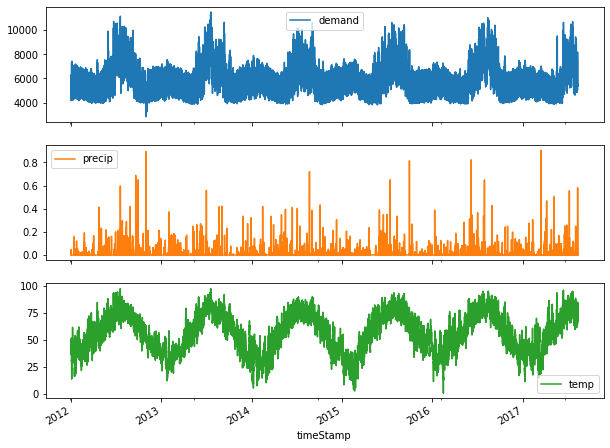

In [45]:
ny_df = df.set_index('timeStamp')
ny_df.plot(subplots=True)

Mean sampling for better analysis, less noise , clearer picture

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f21cbd5a4e0>,
      dtype=object)

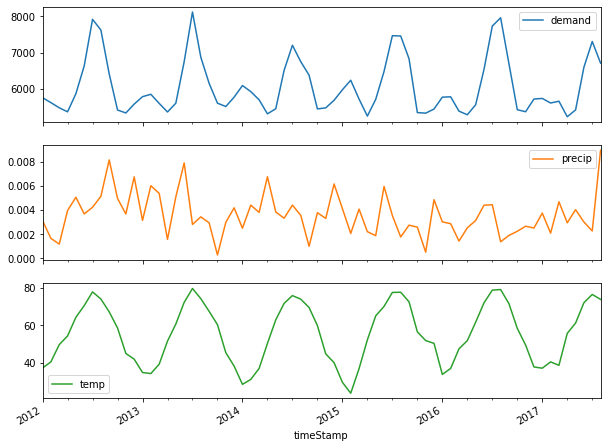

In [46]:
ny_df.resample('M').mean().plot(subplots=True)

In [47]:
df_monthly= ny_df.resample('M').mean()

pmdarima package for implementing ARIMA and SARIMA

In [48]:
!pip install pmdarima

In [49]:
import pmdarima as pm

ARIMA model fitting.
m=12 12 months
p= AutoRegression parameter
d= integration parameter
q= moving average parameter
The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models.

In [50]:
model = pm.auto_arima(df_monthly['demand'],m=12,seasonal=True,
                      start_p=0, start_q=0, max_order=4,
                      test = 'adf',error_action= 'ignore',
                      suppress_warnings= True, stepwise = True, trace= True )

Performing stepwise search to minimize aic
Fit ARIMA(0,0,0)x(1,0,1,12) [intercept=True]; AIC=9828320.563, BIC=9828329.441, Time=0.481 seconds
Fit ARIMA(0,0,0)x(0,0,0,12) [intercept=True]; AIC=1100.321, BIC=1104.760, Time=0.010 seconds
Fit ARIMA(1,0,0)x(1,0,0,12) [intercept=True]; AIC=1023.743, BIC=1032.621, Time=0.598 seconds
Fit ARIMA(0,0,1)x(0,0,1,12) [intercept=True]; AIC=1012.270, BIC=1021.148, Time=0.219 seconds
Near non-invertible roots for order (0, 0, 1)(0, 0, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA(0,0,0)x(0,0,0,12) [intercept=False]; AIC=1380.758, BIC=1382.977, Time=0.008 seconds
Fit ARIMA(1,0,0)x(0,0,0,12) [intercept=True]; AIC=1065.516, BIC=1072.175, Time=0.020 seconds
Fit ARIMA(1,0,0)x(2,0,0,12) [intercept=True]; AIC=1026.318, BIC=1037.416, Time=1.670 seconds
Fit ARIMA(1,0,0)x(1,0,1,12) [intercept=True]; AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA(1,0,0)x(0,0,1,12) [intercept=True]; AIC=1022.396,

In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   68
Model:             SARIMAX(2, 0, 0)x(0, 0, [1, 2], 12)   Log Likelihood                -490.572
Date:                                 Tue, 07 Jul 2020   AIC                            993.144
Time:                                         13:27:08   BIC                           1006.461
Sample:                                              0   HQIC                           998.420
                                                  - 68                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3721.6223    792.261      4.697      0.000    2168.819    5274.425
ar.L1          0.8586      0.123      6.985      0.000       0.618       1.099
ar.L2         -0.4748      0.142     -3.352      0.001      -0.752      -0.197
ma.S.L12       0.8923      0.137      6.501      0.000       0.623       1.161
ma.S.L24       0.4571      0.206      2.222      0.026       0.054       0.860
sigma2      9.046e+04   1.58e+04      5.726      0.000    5.95e+04    1.21e+05
===================================================================================
Ljung-Box (Q):                       64.20   Jarque-Bera (JB):                 5.55
Prob(Q):                              0.01   Prob(JB):                         0.06
Heteroskedasticity (H):               0.78   Skew:                             0.52
Prob(H) (two-sided):                  0.55   Kurtosis:                         3.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
df_monthly

,demand,precip,temp
timeStamp,,,
2012-01-31,5757.495833,0.003116,37.174288
2012-02-29,5622.331609,0.001650,40.448046
2012-03-31,5479.919198,0.001179,49.607917
2012-04-30,5368.945833,0.003959,54.255903
2012-05-31,5867.896102,0.005064,64.188078
...,...,...,...
2017-04-30,5233.477382,0.002942,55.621764
2017-05-31,5421.773060,0.004031,61.115457
2017-06-30,6597.990346,0.003008,71.962625


Divide dataset into training and test sets

In [64]:
train_set =df_monthly[(df_monthly.index.get_level_values(0) >= '2012-01-31') & (df_monthly.index.get_level_values(0) >= '2017-04-30')]
test_set =df_monthly[(df_monthly.index.get_level_values(0) > '2017-04-30')]                                                    

In [67]:
test_set

,demand,precip,temp
timeStamp,,,
2017-05-31,5421.773060,0.004031,61.115457
2017-06-30,6597.990346,0.003008,71.962625
2017-07-31,7306.861511,0.002266,76.380363
2017-08-31,6711.707542,0.008961,73.730258


In [68]:
test_set.shape

(4, 3)

Fit model to train_set

In [69]:
model.fit(train_set['demand'])

ARIMA(maxiter=50, method='lbfgs', order=(2, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 2, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

forecast value for 4 periods in test set with a confidence interval

In [142]:
forecast = model.predict(n_periods=4, return_conf_int= True)

value forecast

In [143]:
forecast

(array([5529.76019196, 5193.04104781, 6107.87426125, 7164.57901393]),
 array([[5470.05499917, 5589.46538474],
        [5117.05954779, 5269.02254783],
        [6028.63722397, 6187.11129854],
        [7062.40714799, 7266.75087987]]))

prediction dataset for comparison with original dataset

In [145]:
forecast_df = pd.DataFrame(forecast[0], index= test_set.index, columns=['Prediction'])

In [146]:
forecast_df

,Prediction
timeStamp,
2017-05-31,5529.760192
2017-06-30,5193.041048
2017-07-31,6107.874261
2017-08-31,7164.579014


The fit on new values does not look accurate lets plot for more values

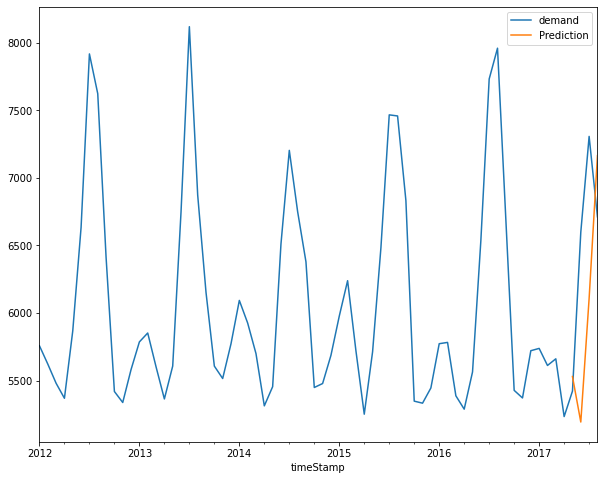

In [147]:
pd.concat([df_monthly['demand'], forecast_df],axis=1).plot()

Plotting for more intervals in unknown zone

In [80]:
forecast1 = model.predict(n_periods=10, return_conf_int=True)

get range of predicted values

In [81]:
forecast1

(array([5529.76019196, 5193.04104781, 6107.87426125, 7164.57901393,
        7083.4876767 , 5964.61199292, 5164.33627229, 5651.11796355,
        6833.51221012, 7278.77278492]), array([[5470.05499917, 5589.46538474],
        [5117.05954779, 5269.02254783],
        [6028.63722397, 6187.11129854],
        [7062.40714799, 7266.75087987],
        [6977.44767331, 7189.5276801 ],
        [5850.5910039 , 6078.63298195],
        [5034.90346384, 5293.76908074],
        [5521.52386415, 5780.71206295],
        [6692.36954062, 6974.65487963],
        [7128.88198522, 7428.66358461]]))

produce forecast for 10 periods starting from the mentioned date

In [151]:
forecast_range = pd.date_range(start="2017-04-25", periods =10, freq = 'M')

In [152]:
forecast1_df = pd.DataFrame(forecast1[0],index = forecast_range, columns=['Predictions'])

This fit fits a lot better than the previous, the valleys are almost in a same line as others and the grdial rising line of prediction grazes the demand original plot.

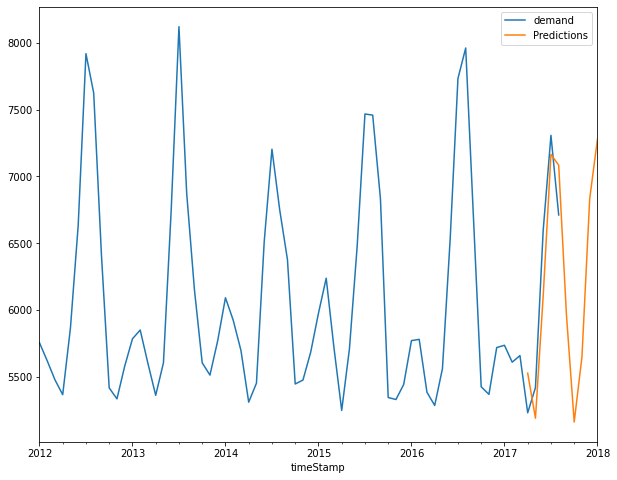

In [153]:
pd.concat([df_monthly['demand'], forecast1_df],axis=1).plot()

Showing the range of confidence interval

In [161]:
lower_bound =pd.Series(forecast1[1][:, 0], index= forecast_range)
upper_bound =pd.Series(forecast1[1][:, 1], index= forecast_range)

Range of predicted values according to confidence interval

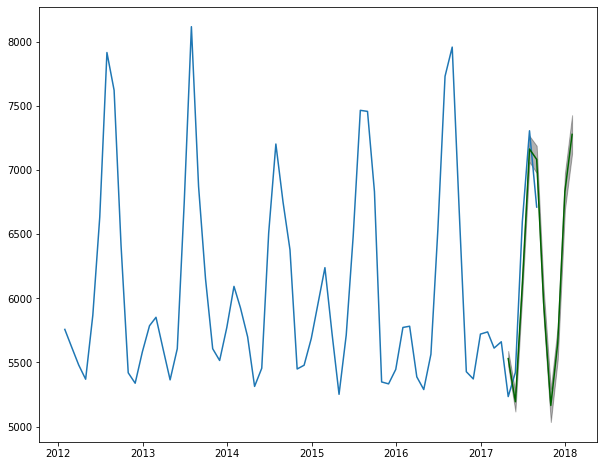

In [162]:
plt.plot(df_monthly['demand'])
plt.plot(forecast1_df, color='darkgreen')
plt.fill_between(forecast_range,lower_bound,upper_bound,color='k',alpha=.30)